In [1]:
import cv2
import google.colab.patches as colab
import matplotlib.pyplot as plt
import numpy

load the license plate image from file

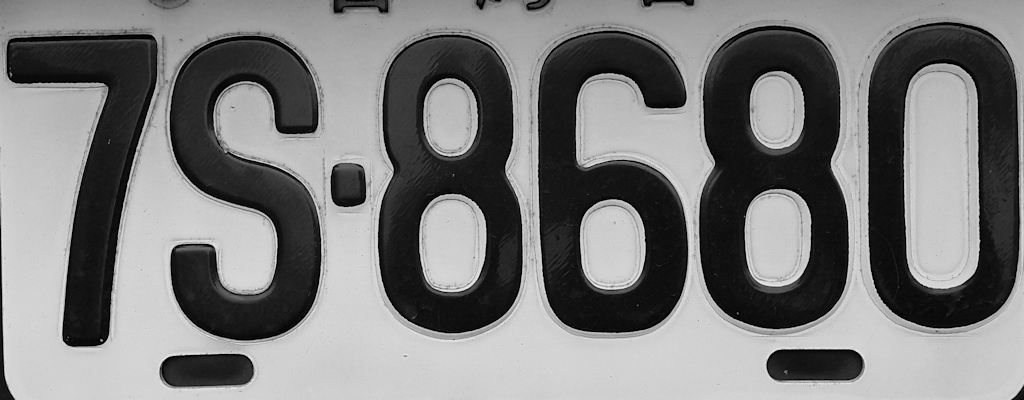

In [2]:
in_mat = cv2.imread("/content/drive/MyDrive/Colab Notebooks/license_plate.bmp", 0)
colab.cv2_imshow(in_mat)

compute the normalized histogram of input image


In [3]:
# get the rows and columns of the input image
rows = in_mat.shape[0]
cols = in_mat.shape[1]

in_hist = numpy.zeros((256), dtype=float)

for r in range(rows):
  for c in range(cols):

    gray_value = in_mat[r, c]
    in_hist[gray_value] = in_hist[gray_value] + 1

for i in range(256):
  in_hist[i] = in_hist[i] / (rows * cols)

display the histogram of the input image


<BarContainer object of 256 artists>

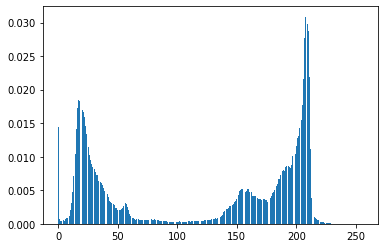

In [4]:
plt.bar(range(in_hist.shape[0]), in_hist)

**Initialization:** initialize four statistical variables $P_0$, $P_1$, $Q_0$, and $Q_1=\sum_{i=0}^{N-1}{i\times Pr(i)}$

In [5]:
P0 = 0.0
P1 = 1.0
Q0 = 0.0
Q1 = 0.0
for i in range(256):
  Q1 += i * in_hist[i]

**Initialization**: initialize two variables $t^*$ and between-class variance $\sigma_{b,max}^2$

In [6]:
t_star = 0
max_bc_var = 0.0  # maximum between-class variance

**Iteration Step**

In [7]:
for i in range(255):

  # Step 1: update four statistical variables
  P0 = P0 + in_hist[i]
  P1 = 1.0 - P0
  Q0 = Q0 + i * in_hist[i]
  Q1 = Q1 - i * in_hist[i]

  # Step 2: proceed two next iteration if P0 or P1 is zero
  if P0 <= 0.0 or P1 <= 0.0:
    continue
  
  # Step 3: compute $mu_0$ and $mu_1$
  mu0 = Q0 / P0
  mu1 = Q1 / P1

  # Step 4: compute between-class variance
  bc_var = P0 * P1 * (mu0 - mu1) * (mu0 - mu1)

  # Step 5: update t_star and max_bc_var if bc_var >= max_bc_var
  if bc_var >= max_bc_var:
    t_star = i
    max_bc_var = bc_var

display the optimal threshold

In [8]:
print(f'optimal threshold:{t_star}')

optimal threshold:108


perform the thresholding using the found threshold

In [9]:
# create an output image
out_mat = numpy.zeros(in_mat.shape, dtype=numpy.uint8)

for r in range(rows):
  for c in range(cols):
    if(in_mat[r, c] <= t_star):
      out_mat[r, c] = 0
    else:
      out_mat[r, c] = 255

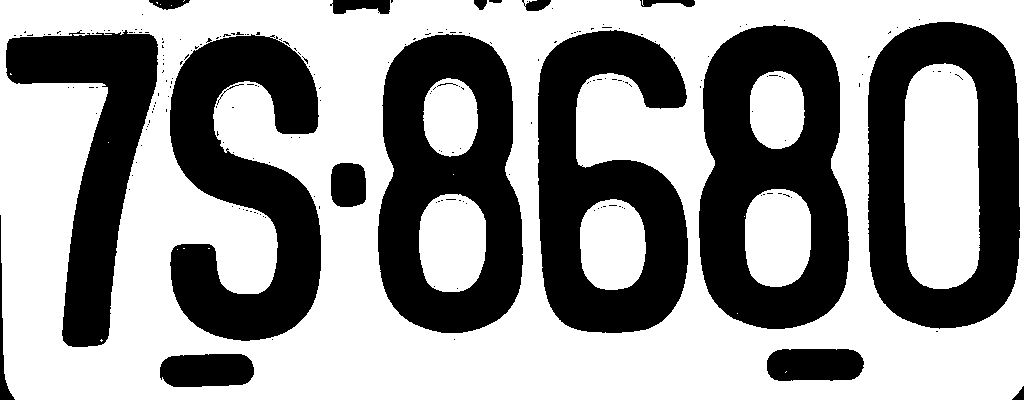

In [10]:
colab.cv2_imshow(out_mat)